In [90]:
# Imports 

import warnings
warnings.filterwarnings('ignore') # Ignore all warnings

%matplotlib inline
import numpy as np
import pandas as pd
import time
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.feature_selection import f_regression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
sns.set(style="whitegrid")

In [2]:
# Load and preview data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.options.display.max_columns = 50

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Variable names 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### About the Data

This data set provides information about a telecom company's customer behavier which can be analysez to identify who is leaving the business and why they are leaving.

The data set has 7043 rows and 21 columns. Each row represents a customer, each column contains customer’s attributes as described below.
<li>Customer ID: Customer ID</li>
<li>Gender: Customer gender (female, male)</li>
<li>SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)</li>
<li>Partner: Whether the customer has a partner or not (Yes, No)</li>
<li>Dependents: Whether the customer has dependents or not (Yes, No)</li>
<li>tenure: Number of months the customer has stayed with the company</li>
<li>PhoneService: Whether the customer has a phone service or not (Yes, No)</li>
<li>MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)</li>
<li>InternetService: Customer’s internet service provider (DSL, Fiber optic, No)</li>
<li>OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)</li>
<li>OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)</li>
<li>DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)</li>
<li>TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)</li>
<li>StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
<li>StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
<li>Contract: The contract term of the customer (Month-to-month, One year, Two year)</li>
<li>PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)</li>
<li>PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
<li>MonthlyCharges: The amount charged to the customer monthly</li>
<li>TotalCharges: The total amount charged to the customer</li>
<li>Churn: Whether the customers has left within the last month or not (Yes, No)</li>


The data set is available [HERE](https://www.kaggle.com/blastchar/telco-customer-churn)

### Cleaning the Data

In [5]:
# Check shape and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are no missing values in the data frame. We have three continious variables and the rest are categorical variables most of which have binary values. 'SeniorCitizen' should be categorical variable as it only indicates whether the customer is a senior citizen or not. 'TotalCharges' should be converted to numeric data type.  The Customer ID column has no valuable information and can just be dropped.  

In [6]:
# Convert SeniorCitizen to Categorical data type
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

# Drop unwanted column
data = data.drop('customerID', 1)
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# Check for missing data after conversion
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The data type conversion above created NaN values because values which can't be converted to numeric are recorded as NaN values by The errors = 'coerce' parameter we used. Since the number of columns with NaN values is too small, we'll go ahead and drop them without loosing information. 

In [8]:
data = data.dropna()

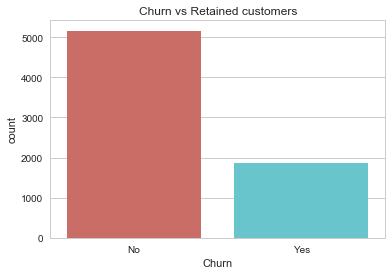

No     5163
Yes    1869
Name: Churn, dtype: int64


In [9]:
sns.countplot(x='Churn', data=data, palette='hls')
plt.title('Churn vs Retained customers')
plt.show()
print(data['Churn'].value_counts())

Out of the 7032 customers, 1869 (26.5%) have left the business and the rest 5163 are retained. 

## Data Exploration

### Continious Variables 

In [10]:
# Statistical summary for whode data set 
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


We can see that the average tenure of customers is 32.42 months which is more than the median tenure. The monthly and total charges also have average values higher than the median value. 

By contrast, customers who leave the business have an average tenure of 18 months and they pay $10 more on monthly charges than the total customer average and about $13 more than retained customers as shown in the tables below. This indicates that customers might be leaving for a better price deal and at the same time it reflects any underlining rewards for loyal customers. 

In [11]:
# Statistical summary for churn customers  
data[data['Churn'] == 'Yes'].describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [12]:
# Statistical summary for retained customers 
data[data['Churn'] == 'No'].describe()

,tenure,MonthlyCharges,TotalCharges
count,5163.00000,5163.000000,5163.000000
mean,37.65001,61.307408,2555.344141
std,24.07694,31.094557,2329.456984
min,1.00000,18.250000,18.800000
25%,15.00000,25.100000,577.825000
50%,38.00000,64.450000,1683.600000
75%,61.00000,88.475000,4264.125000
max,72.00000,118.750000,8672.450000


It can be infered from the tables above and the graph below that tenure and monthly charges are good estimators of churn behavior. The churn customer group is represented mostly by those who have a short tenure but pay more than the other group. 

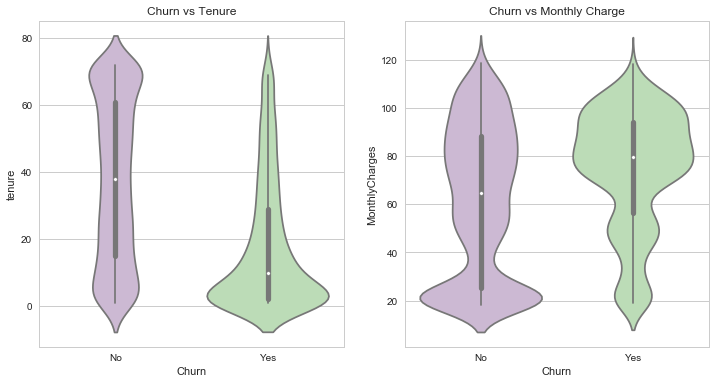

In [13]:
# Visualize relation betwwn churn and continious variables
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x='Churn', y='tenure',
                 data=data, palette='PRGn')
plt.title('Churn vs Tenure')

plt.subplot(1,2,2)
sns.violinplot(x='Churn', y='MonthlyCharges',
                 data=data, palette='PRGn')
plt.title('Churn vs Monthly Charge')

plt.show()

Unsurprisingly, the longer the customer stays with the company, the more revenue the company generates and the relation between the two is a linear one as shown below. 

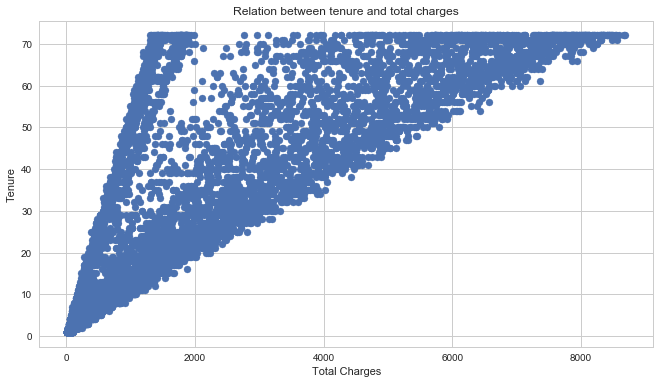

In [14]:
# Tenure vs total charge 
plt.figure(figsize=(11,6))
plt.scatter(x=data['TotalCharges'], y=data['tenure'])
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Relation between tenure and total charges')
plt.show()

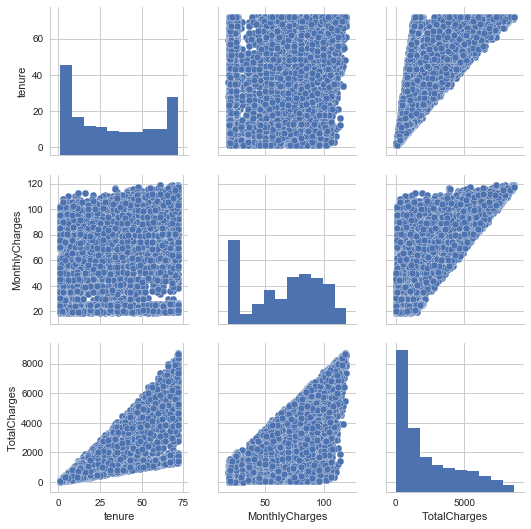

In [15]:
# pairwise plots
continous = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
sns.pairplot(continous)
plt.show()

From the distribution of the tenure variable in the right left corner of the plot above, we can see that there is a high number of customers with only few months of tenure. We have seen in previous analysis that most of the cusomers who left the business happen to the ones who stayed with the company the shortest. Understanding this group of customers is important for reducing the churn rate. Monthly charges are higher for newer customers. 

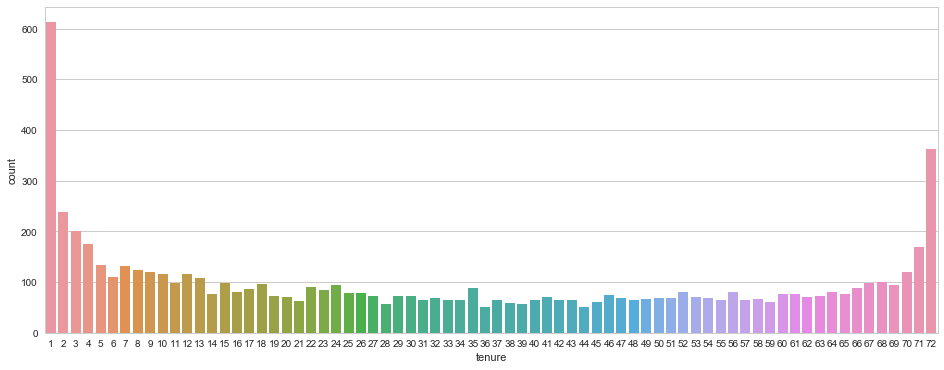

In [16]:
# Distribution of tenure
plt.figure(figsize = (16,6))
sns.countplot(data['tenure'])

Text(0.5,1,'Correlation')

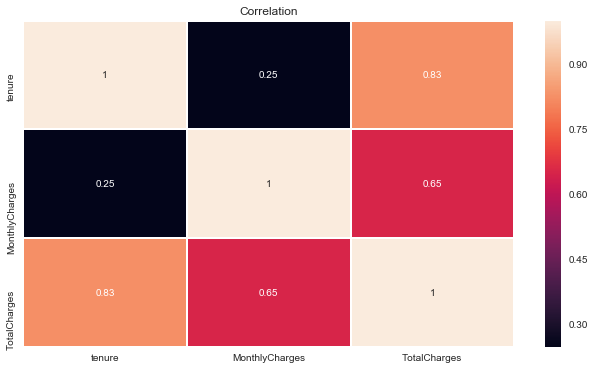

In [17]:
# Visualize correlations between continious variables
plt.figure(figsize=(11,6))
sns.heatmap(data.corr(),linewidth = 1,annot= True)
plt.title('Correlation')

TotalCharge is the product of MontlyCharges and tenure. As a result it is highly correlated with the other two. We will drop the TotalCharge variable when building our models later to avoid overfitting. MonthyCharges and tenure have a low colinearity with eachother and they are suitable for modeling. 

### Categorical Variables 

In [18]:
# Quick summary 
data.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [19]:
7032-5890

1142

From the table above, we can observe that:
<ul>
<li>Male and female customers are almost evenly represented </li>
<li>Senior citizens make up the minority of customer groups</li>
<li>Most customers have Phone services and about half have multiple lines</li>
<li>Electronic check is the most prefered payment method, and</li>
<li>Customers prefer paperless billing and month-to-month contracts</li>
</ul>

In [20]:
# Categorical variables 
categorical = data.select_dtypes(include='object')
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


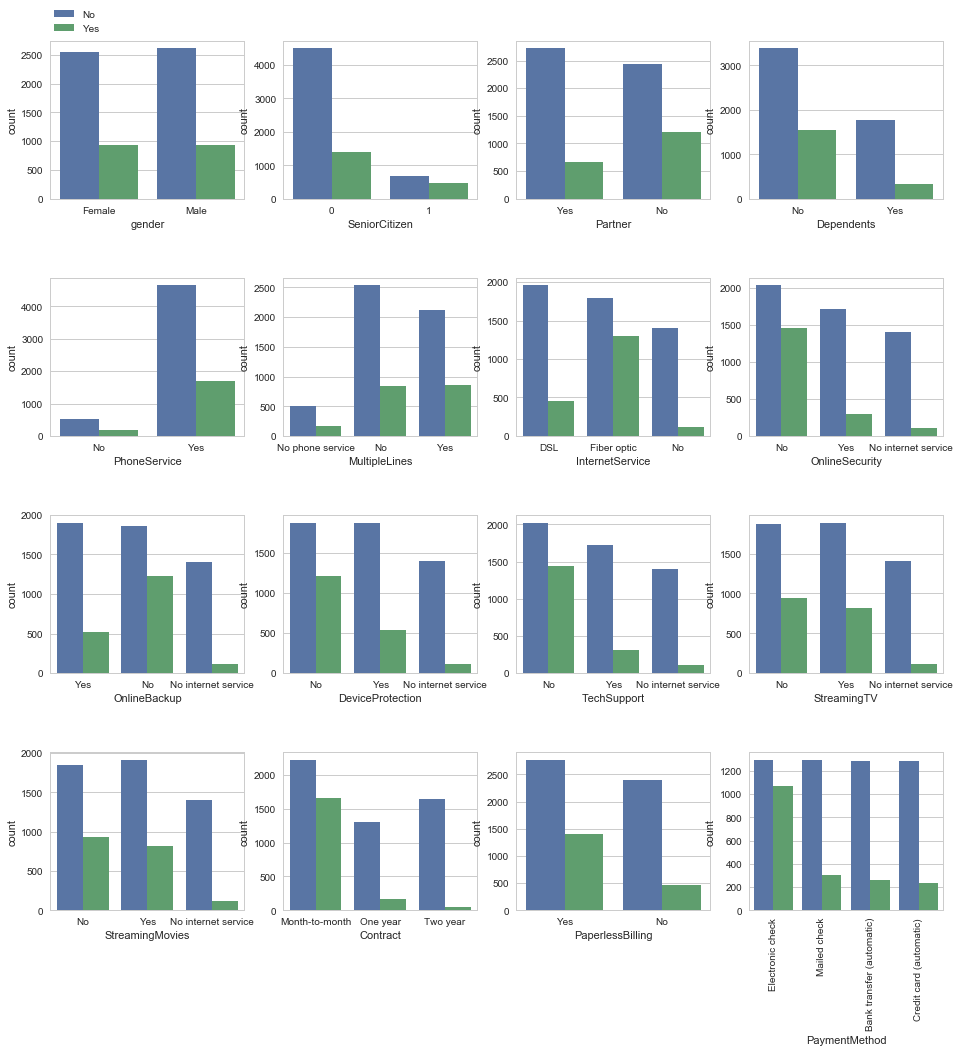

In [21]:
fig,ax =plt.subplots(4,4,figsize=(16,16))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=categorical.iloc[:,i], hue=categorical['Churn'], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(90)

From the graph above we can observe that customer churn is higher in the following group of customers or with the following attributes:
<ul>
    <li>Senior citizens</li>
    <li>Customers who do not have partners</li>
    <li>Customers who do not have dependents</li>
    <li>Customers who have fiber optics internet service</li>
    <li>Customers who do not have either of online security, online backup, device protection, or tech support</li>
    <li>Customers who use Electronic check as a payment method</li>
</ul>

Let's take a closer look at some of these categories and their relation with the continious variables. 

In [22]:
# Subset of the data frame with only churn records 
data_churn = data[data.Churn == 'Yes']
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


<b>Senior Citezens</b>

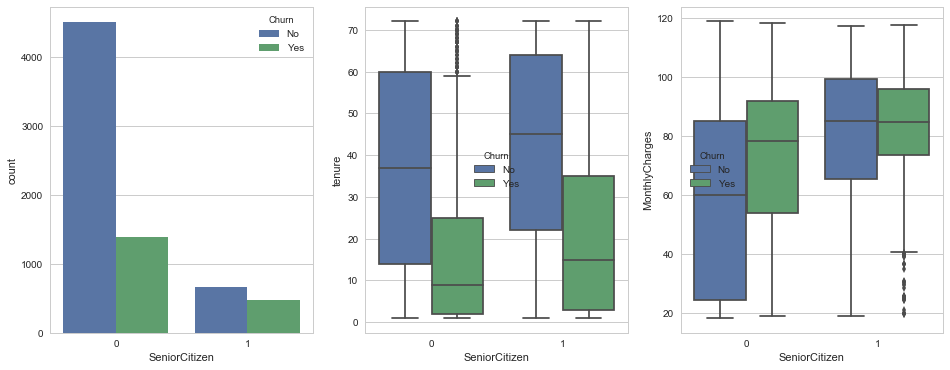

In [23]:
# Examining senior citizens 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.SeniorCitizen, hue = data.Churn)

plt.subplot(1,3,2)
sns.boxplot(x=data.SeniorCitizen, y=data.tenure, hue=data.Churn)

plt.subplot(1,3,3)
sns.boxplot(x=data.SeniorCitizen, y=data.MonthlyCharges, hue=data.Churn)
plt.show()

In [24]:
# Calculate the churn rate among senior  
senior_count = data['SeniorCitizen'].value_counts().tolist()
senior_churn = data_churn[data_churn.SeniorCitizen == 1]


In [25]:
# Total and churn 
print(senior_count)
print(senior_count[1])
print(len(senior_churn))
print('Amount of senior citizens leaving is:{}%'.format(len(senior_churn)/senior_count[1]*100))

[5890, 1142]
1142
476
Amount of senior citizens leaving is:41.68126094570928%


The churn rate for senior citezens is 41.68%  which is much higher than the total churn rate of 26.5%. The ones who leave also have a shorter tenure and overall senior citezens pay higher monthly charges than the rest of the customers. 

<b>Customers who do not have partners</b>

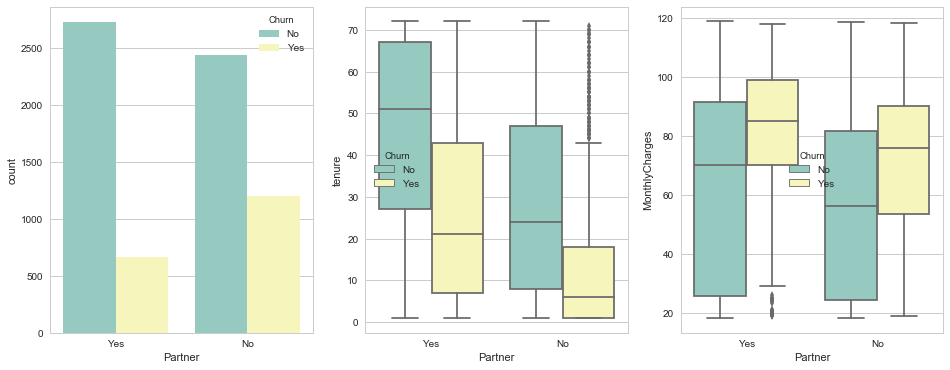

In [26]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.Partner, hue = data.Churn, palette="Set3")

plt.subplot(1,3,2)
sns.boxplot(x=data.Partner, y=data.tenure, hue=data.Churn, palette="Set3")

plt.subplot(1,3,3)
sns.boxplot(x=data.Partner, y=data.MonthlyCharges, hue=data.Churn, palette="Set3")
plt.show()

In [27]:
# Calculate the churn rate among customers with no partners  
partner_count = data['Partner'].value_counts().tolist()
partner_churn = data_churn[data_churn.Partner == 'No']

# Total and churn 
print(partner_count[1])
print(len(partner_churn))
print('Churn rate for customers who do not have partners is:{}%'.format(len(partner_churn)/partner_count[0]*100))

3393
1200
Churn rate for customers who do not have partners is:32.97609233305853%


Customers who do not have partners have a churn rate of 32.97% which is higher than the overall rate of 26.5%. The diagrams show that this group has a much shorter tenure and they pay more monthly charge than the overall average of 64.79$. 

<b>Customers who do not have dependents</b>

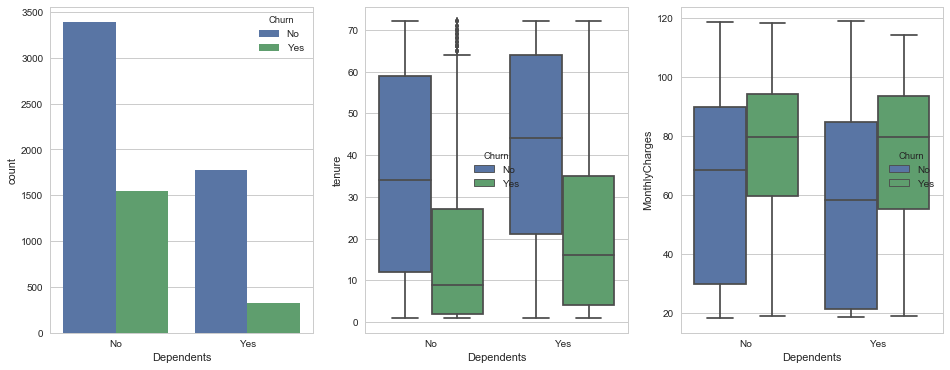

In [28]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.Dependents, hue = data.Churn)

plt.subplot(1,3,2)
sns.boxplot(x=data.Dependents, y=data.tenure, hue=data.Churn)

plt.subplot(1,3,3)
sns.boxplot(x=data.Dependents, y=data.MonthlyCharges, hue=data.Churn)
plt.show()

In [29]:
# Calculate the churn rate among customers with no dependents  
dependent_count = data['Dependents'].value_counts().tolist()
dependent_churn = data_churn[data_churn.Dependents == 'No']

# Total and churn 
print(dependent_count[1])
print(len(dependent_churn))
print('Churn rate for customers who do not have dependents is:{}%'.format(len(dependent_churn)/dependent_count[0]*100))

2099
1543
Churn rate for customers who do not have dependents is:31.279140482465028%


The churn rate among customers who do not have dependents is higher than the overall average. They also pay more than the overall average fee and have shorter tenure.

<b>Customers who have fiber optics internet service</b>

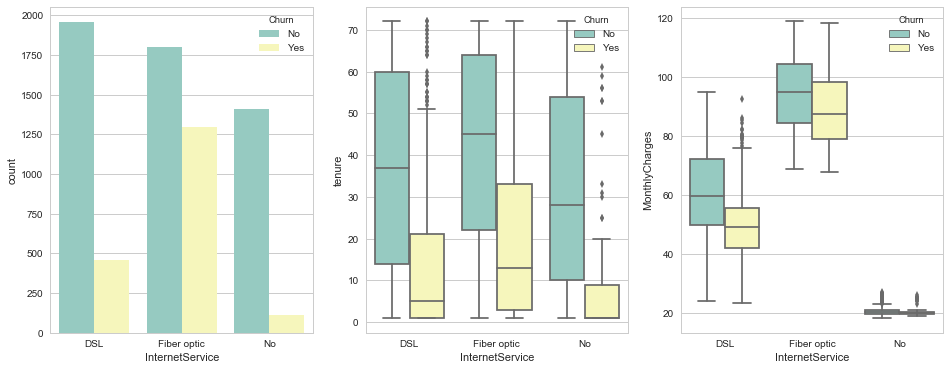

In [30]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.InternetService, hue = data.Churn, palette="Set3")

plt.subplot(1,3,2)
sns.boxplot(x=data.InternetService, y=data.tenure, hue=data.Churn, palette="Set3")

plt.subplot(1,3,3)
sns.boxplot(x=data.InternetService, y=data.MonthlyCharges, hue=data.Churn, palette="Set3")
plt.show()

In [31]:
# Calculate the churn rate among customers with fiber optics internet service  
fiber_count = data['InternetService'].value_counts().tolist()
fiber_churn = data_churn[data_churn.InternetService == 'Fiber optic']

# Total and churn 
print(fiber_count[0])
print(len(fiber_churn))
print('Churn rate for customers who have Fiber optics internet service is:{}%'.format(len(fiber_churn)/fiber_count[0]*100))

3096
1297
Churn rate for customers who have Fiber optics internet service is:41.89276485788114%


In [32]:
print(fiber_count)

[3096, 2416, 1520]


Customers who have fiber optics internet service have a high churn rate of 42% which is again much larger than the overall rate of 26.5%. This churn group is also characterized by lower than average tenure and higher than average monthly charge. Since the churn rate is very high, it needs further investigation. 

<b>Customers who use Electronic Check as a payment method</b>

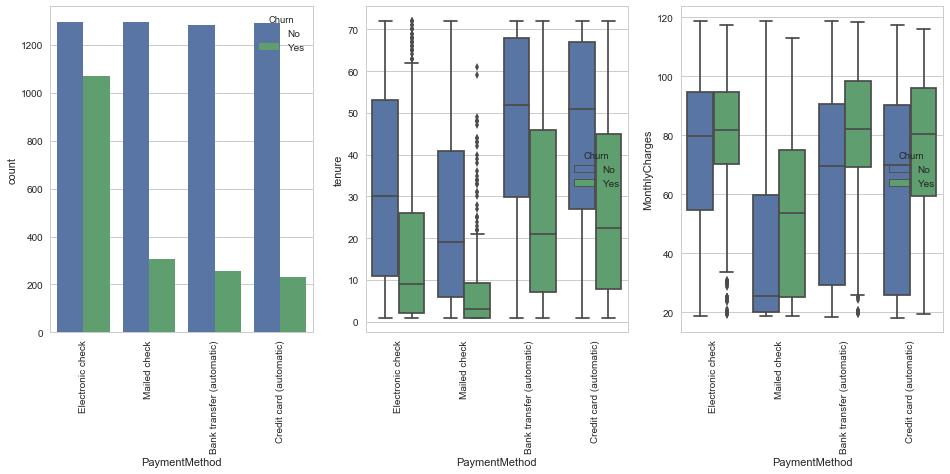

In [33]:
# Examining customers who use electronic check as a payment method  
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.PaymentMethod, hue = data.Churn)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x=data.PaymentMethod, y=data.tenure, hue=data.Churn)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x=data.PaymentMethod, y=data.MonthlyCharges, hue=data.Churn)
plt.xticks(rotation=90)
plt.show()

In [34]:
print(data['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [35]:
# Calculate the churn rate among customers with no dependents  
e_check_count = data['PaymentMethod'].value_counts().tolist()
e_check_churn = data_churn[data_churn.PaymentMethod == 'Electronic check']

# Total and churn 
print(e_check_count[0])
print(len(e_check_churn))
print('Churn rate for customers who use Electronic check as payment method is:{}%'.format(len(e_check_churn)/e_check_count[0]*100))

2365
1071
Churn rate for customers who use Electronic check as payment method is:45.28541226215645%


Customers who use Electronic check as a payment method have a 45% churn rate which is much higher than the 26.5% total average. The graph shows considerable differences in the churn proportion with the other three payment methods. This group also has lower than average tenure and higher monthly charge than the whole average.   

## Modeling

The following supervised learning models will be used to predict customer churn
<ul>
    <li>Naive Bayes Bernoulli Classifier</li>
    <li>K-nearest neighbors (KNN)</li>
    <li>logistics Regression</li>
    <li>Ridge Classifier</li>
    <li>Lasso (Logistics regression with l1 regularization parameter)</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest</li>
    <li>Support Vector Classifier (SVC)</li>
    <li>Gradient Boost Classification</li>
</ul>

We will use a holdout group by spliting the data. We will use Principal Component Analysis (PCA) and SelectKbest methods to reduce the dimentionality and GridSearchCV for tuning parameters. 

<b>Evaluation</b>

We will use accuracy score, confusion matrix, classification report, and AUC (Area Under the Curve) to evaluate the models. We'll compare scores for both training and test. Ideally, we want the test set score to be just a little lower than the training set score. A bigger difference shows overfitting. 

AUC curve is generated by ploting true positive rates against false positive rates. A model with AUC value closer to 1 is a better model.


We have seen earlier that the gender variable is not a good indicator since the churn rate is the same for both female and male values. So we can go ahead and drop it. 

In [36]:
# Drop gender and confirm change
data = data.drop('gender',1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handling categorical variables 

The data set is mostly comprised of categorical variables. Machine learning algorithms require all variables to be numeric. We will use pands's get_dummies method to create dummy variables with binary representation of each value in the categorical variables. Lebel encoding is another option to handle categorical data but, since the values do not have ordinal relationship, the models might result in a poor result.

In [37]:
# Print values in each category
categorical = data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.unique())

SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


The SeniorCitezen variable is represented with binary digits. Let's replace that with 'Yes' and 'No' strings so that when we create dummy variables, it will be represented with two columns properly. We will do the opposite for 'Churn' variable since it's our target variable and we want a binary representation in the same column. 

In [38]:
# encode 0 for No and 1 for Yes
data['SeniorCitizen'] = data['SeniorCitizen'].replace(0, 'No')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(1, 'Yes')
data['Churn'] = data['Churn'].replace(['No'], 0)
data['Churn'] = data['Churn'].replace(['Yes'], 1)

In [39]:
# Confirm Changes 
data.tail()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


## Fixing Class Imbalance 

As we have seen earlier, there is a class imbalance in the outcome variable which would make the accuracy scores unreliable if left unfixed.  

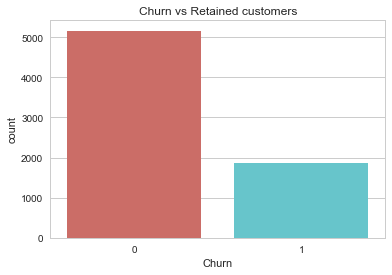

0    5163
1    1869
Name: Churn, dtype: int64


In [67]:
sns.countplot(x='Churn', data=data, palette='hls')
plt.title('Churn vs Retained customers')
plt.show()
print(data['Churn'].value_counts())

We will resample the data by domwnsampling the majority group. 

1    1869
0    1869
Name: Churn, dtype: int64
We now have a sample with balanced class


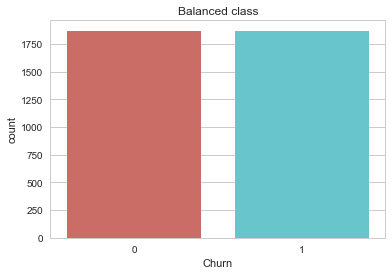

In [68]:
#Import module and resampling 

from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data.Churn==0]
data_minority = data[data.Churn==1]
 
# Downsample majority overall class
data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1869,     # len(reviews_raw_minority)
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority overall class
data_resampled = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
print(data_resampled.Churn.value_counts())
print('We now have a sample with balanced class')

sns.countplot(x='Churn', data=data_resampled, palette='hls')
plt.title('Balanced class')
plt.show()

### Dependent and Independent Variables

In [69]:
# define target and predictor variables and get dummies
X = data_resampled.drop('Churn', 1)
Y = data_resampled['Churn']
X = pd.get_dummies(X)


In [70]:
# a lot of columns
X.shape

(3738, 44)

In [71]:
# preview
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5392,63,39.35,2395.05,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0
4822,72,104.90,7559.55,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
2555,8,60.00,487.75,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
6013,50,100.65,5189.75,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
6263,25,54.20,1423.15,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0


In [72]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Models

## 1. Bernoulli Naive Bayes Classifier

[0.72727273 0.71657754 0.67112299 0.69786096 0.69518717 0.69786096
 0.69251337 0.72192513 0.72192513 0.66935484]
Training set score: 0.7033639143730887

Test set score: 0.6934046345811051
             precision    recall  f1-score   support

          0       0.73      0.63      0.68       578
          1       0.66      0.76      0.71       544

avg / total       0.70      0.69      0.69      1122

Confusion matrix
[[366 212]
 [132 412]]


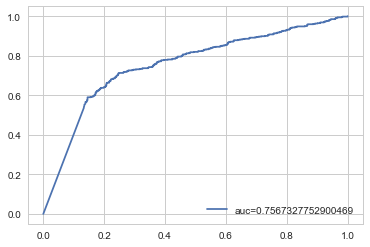


Runtime: 0.22 seconds


In [73]:
# bernoulli
start_time = time.clock()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_Naive = mnb.predict(X_test)

# score
score_mnb = cross_val_score(mnb, X, Y, cv=10)
print(score_mnb)
print('Training set score:', mnb.score(X_train, y_train))
print('\nTest set score:', mnb.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_Naive))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_Naive))

# AUC 
y_pred_proba = mnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 2. KNN Classifier (K-nearest neighbors)

[0.72459893 0.72994652 0.70855615 0.70855615 0.69518717 0.68983957
 0.71657754 0.7486631  0.71657754 0.68548387]
Training set score: 0.9988532110091743

Test set score: 0.6827094474153298
             precision    recall  f1-score   support

          0       0.70      0.68      0.69       578
          1       0.67      0.68      0.68       544

avg / total       0.68      0.68      0.68      1122

Confusion matrix
[[395 183]
 [173 371]]


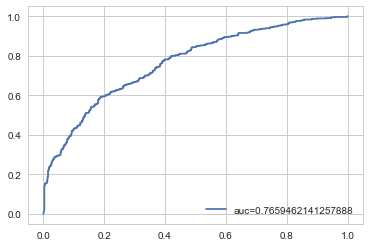


Runtime: 0.56 seconds


In [74]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=50, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
score_neigh = cross_val_score(neigh, X, Y, cv=10)
print(score_neigh)
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_knn))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 3. Logistics Regression

Training set score: 0.77217125382263

Test set score: 0.7513368983957219
[0.78342246 0.76203209 0.74064171 0.77540107 0.72994652 0.77807487
 0.77540107 0.78074866 0.76737968 0.72580645]
Confusion matrix
[[417 161]
 [118 426]]
             precision    recall  f1-score   support

          0       0.78      0.72      0.75       578
          1       0.73      0.78      0.75       544

avg / total       0.75      0.75      0.75      1122



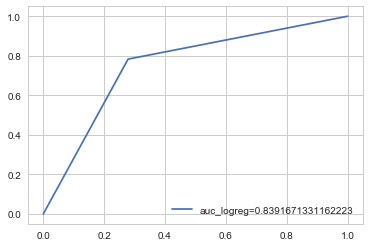


Runtime: 0.46 seconds


In [75]:
# Binary classification using logistics regression
start_time = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Compare scores for train and test sets
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

# Ten fold cross validation score to evaluate the model 
score_logreg = cross_val_score(logreg, X, Y, cv=10)
print(score_logreg)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 4. Ridge Classifier

In [76]:
# Ridge classifier
start_time = time.clock()
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)

# Evaluations
score_ridge = cross_val_score(ridge, X, Y, cv=10)
print(score_ridge)
print('Training set score:', ridge.score(X_train, y_train))
print('\nTest set score:', ridge.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_ridge))

# Classification report 
print(classification_report(y_test, y_ridge)) 

# AUC
y_ridge_proba = ridge.predict_proba(X_test)[::,1]
fpr_ridge, tpr_ridge, _ = metrics.roc_curve(y_test,  y_ridge)
auc_ridge = metrics.roc_auc_score(y_test, y_ridge_proba)
plt.plot(fpr_ridge,tpr_ridge,label='auc_ridge='+str(auc_ridge))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

[0.78609626 0.75935829 0.72994652 0.76737968 0.7486631  0.74331551
 0.76737968 0.77540107 0.76737968 0.7311828 ]
Training set score: 0.7660550458715596

Test set score: 0.7468805704099821
Confusion matrix
[[417 161]
 [123 421]]
             precision    recall  f1-score   support

          0       0.77      0.72      0.75       578
          1       0.72      0.77      0.75       544

avg / total       0.75      0.75      0.75      1122



AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'

## 5. Lasso (Logistics regression with l1 regularization parameter)

Training set score: 0.7717889908256881

Test set score: 0.749554367201426
[0.78074866 0.76203209 0.74331551 0.77540107 0.73262032 0.77540107
 0.77272727 0.78342246 0.76203209 0.72580645]
Confusion matrix
[[415 163]
 [118 426]]
             precision    recall  f1-score   support

          0       0.78      0.72      0.75       578
          1       0.72      0.78      0.75       544

avg / total       0.75      0.75      0.75      1122



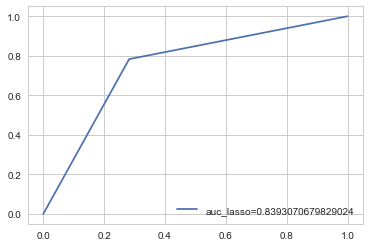


Runtime: 1.39 seconds


In [77]:

start_time = time.clock()
lasso = LogisticRegression(penalty='l1')
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)

# Evaluations
print('Training set score:', lasso.score(X_train, y_train))
print('\nTest set score:', lasso.score(X_test, y_test))

score_lasso = cross_val_score(lasso, X, Y, cv=10)
print(score_lasso)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_lasso))

# Classification report 
print(classification_report(y_test, y_lasso))

# AUC
y_lasso_proba = lasso.predict_proba(X_test)[::,1]
fpr_lasso, tpr_lasso, _ = metrics.roc_curve(y_test,  y_lasso)
auc_lasso = metrics.roc_auc_score(y_test, y_lasso_proba)
plt.plot(fpr_lasso,tpr_lasso,label='auc_lasso='+str(auc_lasso))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 6. Decision Tree Classifier

tree_para: {'criterion': 'entropy', 'max_depth': 4}
Training set score: 0.7694954128440367

Test set score: 0.7406417112299465
[0.7486631  0.75668449 0.7540107  0.74064171 0.73529412 0.7459893
 0.78074866 0.74064171 0.78342246 0.72580645]
Confusion matrix
[[432 146]
 [145 399]]
             precision    recall  f1-score   support

          0       0.75      0.75      0.75       578
          1       0.73      0.73      0.73       544

avg / total       0.74      0.74      0.74      1122



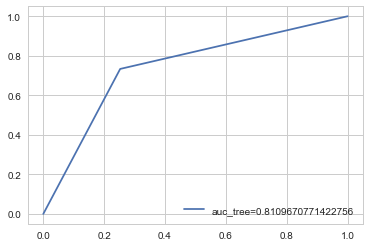


Runtime: 10.28 seconds


In [78]:
# Decision tree using GridSearchCV parameters
start_time = time.clock()
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,300,350,400,500]}
tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
grid_fit = tree.fit(X_train, y_train)

best_tree = grid_fit.best_estimator_
y_tree = best_tree.predict(X_test)

#print best parameters
print('tree_para:', tree.best_params_)

# Evaluations
print('Training set score:', best_tree.score(X_train, y_train))
print('\nTest set score:', best_tree.score(X_test, y_test))

score_tree = cross_val_score(best_tree, X, Y, cv=10)
print(score_tree)

#Confusion matrix for decision tree
print('Confusion matrix')
print(confusion_matrix(y_test, y_tree))

# Classification report 
print(classification_report(y_test, y_tree))

# AUC for decision tree classifier
y_tree_proba = best_tree.predict_proba(X_test)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test,  y_tree)
auc_tree = metrics.roc_auc_score(y_test, y_tree_proba)
plt.plot(fpr_tree,tpr_tree,label='auc_tree='+str(auc_tree))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 7. Random Forest

forest_para: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 500}
[0.80213904 0.76470588 0.73529412 0.77005348 0.75668449 0.75935829
 0.78877005 0.77807487 0.76737968 0.75      ]
Confusion matrix
[[413 165]
 [109 435]]
             precision    recall  f1-score   support

          0       0.79      0.71      0.75       578
          1       0.72      0.80      0.76       544

avg / total       0.76      0.76      0.76      1122



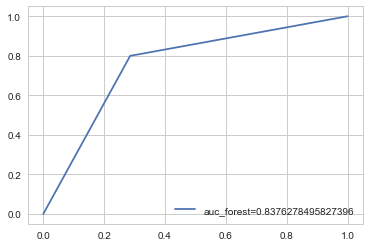


Runtime: 2259.63 seconds


In [79]:
# Random forest with GridsearchCV
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'n_estimators':[10,20,50,70,100,250,400,500],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200,300,400,500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

#Print best parameters
print('forest_para:', forest.best_params_)

# Evaluations
score_forest = cross_val_score(best_forest, X, Y, cv=10)
print(score_forest)

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 8. Support Vector Classifier (SVC)

[0.80213904 0.76470588 0.73529412 0.77005348 0.75668449 0.75935829
 0.78877005 0.77807487 0.76737968 0.75      ]
Training set score: 0.7706422018348624

Test set score: 0.7183600713012478
Confusion matrix
[[393 185]
 [131 413]]
             precision    recall  f1-score   support

          0       0.75      0.68      0.71       578
          1       0.69      0.76      0.72       544

avg / total       0.72      0.72      0.72      1122



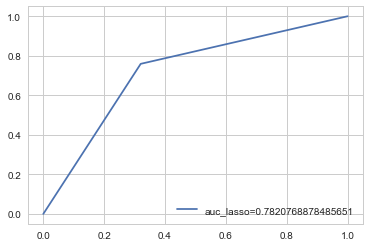


Runtime: 4036.82 seconds


In [80]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
score_clf = cross_val_score(clf, X, Y, cv=10)
print(score_forest)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 9. Gradient Boost Classification

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   41.1s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.1min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   39.2s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.8min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.1s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.5min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.5min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.5min finished


[0.86121994 0.84139524 0.82462324 0.8558509  0.8366516 ]
Confusion matrix
[[414 164]
 [113 431]]
             precision    recall  f1-score   support

          0       0.79      0.72      0.75       578
          1       0.72      0.79      0.76       544

avg / total       0.76      0.75      0.75      1122



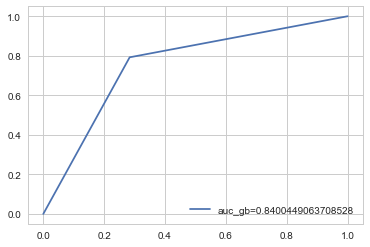


Runtime: 1996.71 seconds


In [81]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X, Y, cv=5)
print(score_gb)

#print('Training set score:', gb_clf.score(X_train, y_train))
#print('\nTest set score:', gb_clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

# PCA and Select K best 

In [91]:
# Select 30 of the 44 features based on f_regression test
# This gave the best result after many trials 
#from sklearn.feature_selection import f_regression
selection = SelectKBest(score_func=f_regression, k=30)
X_kbest = selection.fit(X, Y).transform(X)

In [92]:
# transform  
X_kbest_tra = StandardScaler().fit_transform(X_kbest)

In [95]:
# Initiate pca
pca =PCA(n_components=15)

In [96]:
# Fit with selected features
X_pca = pca.fit_transform(X_kbest_tra)

# Varience in pca
varience = pca.explained_variance_ratio_.cumsum()
print('Varience expained by principal components:', varience)

Varience expained by principal components: [0.33254036 0.49439279 0.57312878 0.64805246 0.7039911  0.7472849
 0.78872829 0.8277051  0.86473631 0.89534075 0.92398403 0.94619548
 0.96625162 0.98334568 0.99591511]


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.3, random_state = 42)

## Model fit by PCA components 

## Bernouli Naive Bayes Classifier

In [98]:
# bernoulli
start_time = time.clock()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_Naive = mnb.predict(X_test)

# score
score_mnb = cross_val_score(mnb, X_pca, Y, cv=10)
print(score_mnb)
print('Training set score:', mnb.score(X_train, y_train))
print('\nTest set score:', mnb.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_Naive))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_Naive))

# AUC 
y_pred_proba = mnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

ValueError: Input X must be non-negative

## KNN Classifier

[0.7459893  0.73529412 0.72727273 0.72994652 0.71390374 0.72459893
 0.77005348 0.74331551 0.7513369  0.7016129 ]
Training set score: 0.9988532110091743

Test set score: 0.7245989304812834
             precision    recall  f1-score   support

          0       0.78      0.65      0.71       578
          1       0.68      0.80      0.74       544

avg / total       0.73      0.72      0.72      1122

Confusion matrix
[[377 201]
 [108 436]]


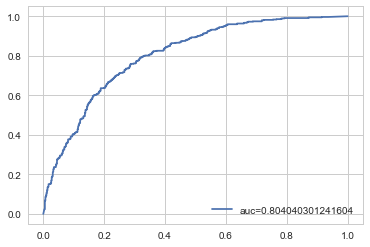


Runtime: 1.02 seconds


In [99]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=50, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
score_neigh = cross_val_score(neigh, X_pca, Y, cv=10)
print(score_neigh)
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_knn))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Logistics Regression

Training set score: 0.7652905198776758

Test set score: 0.7522281639928698
[0.77807487 0.76470588 0.73796791 0.75935829 0.75935829 0.74331551
 0.78074866 0.77540107 0.7486631  0.73387097]
Confusion matrix
[[423 155]
 [123 421]]
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       578
          1       0.73      0.77      0.75       544

avg / total       0.75      0.75      0.75      1122



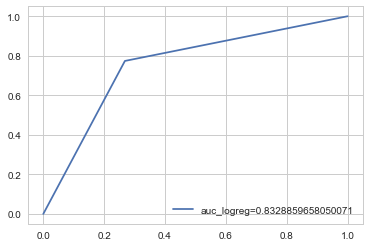


Runtime: 0.22 seconds


In [102]:
# Binary classification using logistics regression
start_time = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Compare scores for train and test sets
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

# Ten fold cross validation score to evaluate the model 
score_logreg = cross_val_score(logreg, X_pca, Y, cv=10)
print(score_logreg)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Ridge Classifier

In [103]:
# Ridge classifier
start_time = time.clock()
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)

# Evaluations
score_ridge = cross_val_score(ridge, X_pca, Y, cv=10)
print(score_ridge)
print('Training set score:', ridge.score(X_train, y_train))
print('\nTest set score:', ridge.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_ridge))

# Classification report 
print(classification_report(y_test, y_ridge)) 

# AUC
y_ridge_proba = ridge.predict_proba(X_test)[::,1]
fpr_ridge, tpr_ridge, _ = metrics.roc_curve(y_test,  y_ridge)
auc_ridge = metrics.roc_auc_score(y_test, y_ridge_proba)
plt.plot(fpr_ridge,tpr_ridge,label='auc_ridge='+str(auc_ridge))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

[0.78342246 0.7486631  0.73262032 0.76203209 0.76737968 0.73262032
 0.77272727 0.77540107 0.75668449 0.72311828]
Training set score: 0.7595565749235474

Test set score: 0.7477718360071302
Confusion matrix
[[412 166]
 [117 427]]
             precision    recall  f1-score   support

          0       0.78      0.71      0.74       578
          1       0.72      0.78      0.75       544

avg / total       0.75      0.75      0.75      1122



AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'

## Lasso

Training set score: 0.764525993883792

Test set score: 0.7522281639928698
[0.77807487 0.76470588 0.73529412 0.75935829 0.75668449 0.74064171
 0.77807487 0.77540107 0.7486631  0.73387097]
Confusion matrix
[[423 155]
 [123 421]]
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       578
          1       0.73      0.77      0.75       544

avg / total       0.75      0.75      0.75      1122



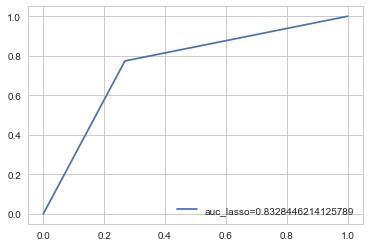


Runtime: 0.21 seconds


In [104]:
start_time = time.clock()
lasso = LogisticRegression(penalty='l1')
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)

# Evaluations
print('Training set score:', lasso.score(X_train, y_train))
print('\nTest set score:', lasso.score(X_test, y_test))

score_lasso = cross_val_score(lasso, X_pca, Y, cv=10)
print(score_lasso)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_lasso))

# Classification report 
print(classification_report(y_test, y_lasso))

# AUC
y_lasso_proba = lasso.predict_proba(X_test)[::,1]
fpr_lasso, tpr_lasso, _ = metrics.roc_curve(y_test,  y_lasso)
auc_lasso = metrics.roc_auc_score(y_test, y_lasso_proba)
plt.plot(fpr_lasso,tpr_lasso,label='auc_lasso='+str(auc_lasso))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Decision Tree

tree_para: {'criterion': 'gini', 'max_depth': 4}
Training set score: 0.7779051987767585

Test set score: 0.7335115864527629
[0.76203209 0.78074866 0.72994652 0.76470588 0.72994652 0.74064171
 0.74331551 0.7513369  0.7513369  0.71236559]
Confusion matrix
[[405 173]
 [126 418]]
             precision    recall  f1-score   support

          0       0.76      0.70      0.73       578
          1       0.71      0.77      0.74       544

avg / total       0.74      0.73      0.73      1122



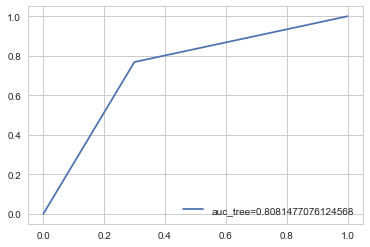


Runtime: 24.22 seconds


In [105]:
# Decision tree using GridSearchCV parameters
start_time = time.clock()
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,300,350,400,500]}
tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
grid_fit = tree.fit(X_train, y_train)

best_tree = grid_fit.best_estimator_
y_tree = best_tree.predict(X_test)

#print best parameters
print('tree_para:', tree.best_params_)

# Evaluations
print('Training set score:', best_tree.score(X_train, y_train))
print('\nTest set score:', best_tree.score(X_test, y_test))

score_tree = cross_val_score(best_tree, X_pca, Y, cv=10)
print(score_tree)

#Confusion matrix for decision tree
print('Confusion matrix')
print(confusion_matrix(y_test, y_tree))

# Classification report 
print(classification_report(y_test, y_tree))

# AUC for decision tree classifier
y_tree_proba = best_tree.predict_proba(X_test)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test,  y_tree)
auc_tree = metrics.roc_auc_score(y_test, y_tree_proba)
plt.plot(fpr_tree,tpr_tree,label='auc_tree='+str(auc_tree))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Random Forest

forest_para: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
[0.77272727 0.75935829 0.74064171 0.75935829 0.72192513 0.73262032
 0.7540107  0.76737968 0.7513369  0.72311828]
Confusion matrix
[[438 140]
 [139 405]]
             precision    recall  f1-score   support

          0       0.76      0.76      0.76       578
          1       0.74      0.74      0.74       544

avg / total       0.75      0.75      0.75      1122



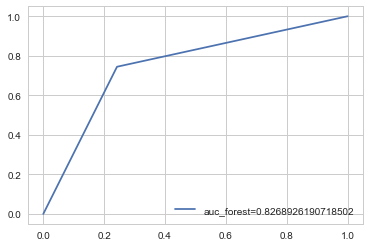


Runtime: 4687.63 seconds


In [106]:
# Random forest with GridsearchCV
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'n_estimators':[10,20,50,70,100,250,400,500],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200,300,400,500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

#Print best parameters
print('forest_para:', forest.best_params_)

# Evaluations
score_forest = cross_val_score(best_forest, X_pca, Y, cv=10)
print(score_forest)

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Support Vector Classifier (SVC)

[0.77272727 0.75935829 0.74064171 0.75935829 0.72192513 0.73262032
 0.7540107  0.76737968 0.7513369  0.72311828]
Training set score: 0.7656727828746177

Test set score: 0.7468805704099821
Confusion matrix
[[413 165]
 [119 425]]
             precision    recall  f1-score   support

          0       0.78      0.71      0.74       578
          1       0.72      0.78      0.75       544

avg / total       0.75      0.75      0.75      1122



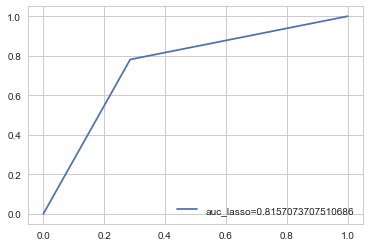


Runtime: 1202.75 seconds


In [107]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
score_clf = cross_val_score(clf, X_pca, Y, cv=10)
print(score_forest)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## Gradient Boost Classifier 

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.1s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  4.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.1min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.2min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.2s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.2min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.2min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.3min finished


[0.85091081 0.83092525 0.81200492 0.83650519 0.8227652 ]
Confusion matrix
[[420 158]
 [127 417]]
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       578
          1       0.73      0.77      0.75       544

avg / total       0.75      0.75      0.75      1122



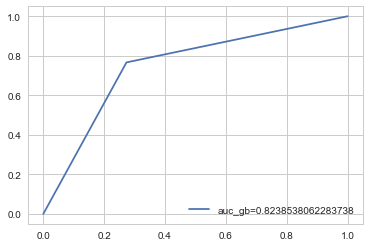


Runtime: 1846.85 seconds


In [108]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X_pca, Y, cv=5)
print(score_gb)

#print('Training set score:', gb_clf.score(X_train, y_train))
#print('\nTest set score:', gb_clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))